In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import glob

from gwtess import Gwtess
%matplotlib inline

In [2]:


tesspath = '../data/tess-bandpass.csv'
spectrapath = glob.glob('../data/spectrum-at-*.csv')

GWT = Gwtess(tesspath, spectrapath)

eventAbsMag = GWT.get_obs_absmag()


/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [3]:
mag = GWT.get_apmag(eventAbsMag, 41E6)
1.E6 / (GWT.TESS_noise_1h(mag) / np.sqrt(6))

array([ 57.33681602,  58.00533881,  46.45919481,  23.4979663 ,
         4.82048539,   1.01155539,   0.0996127 ,   0.06218588])

In [4]:
rate = 1540 + 3200#-1220#
a = np.random.uniform(-0.5,0.5,size=rate*100 ) * 1.E9
b = np.random.uniform(-0.5,0.5,size=rate*100) * 1.E9
c = np.random.uniform(-0.5,0.5,size=rate*100) * 1.E9

In [5]:
distances = np.sqrt(a**2 + b**2 + c**2)

In [6]:
distances[distances < 67E6].shape[0] * 0.05 

26.0

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


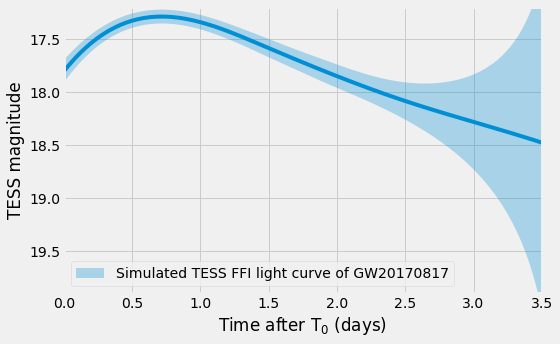

In [51]:
# yerr = np.log10(1-GWT.TESS_noise_1h(mag))/-0.4
f5 = interp1d(GWT.time, mag, kind='cubic',
                          bounds_error=False, fill_value='extrapolate')

t_sim = np.arange(0,10,1./48)
m_sim = f5(t_sim)

# yerr = np.log10((1.0 - (GWT.TESS_noise_1h(mag)/1.E6 / np.sqrt(0.5)))) / -0.4
# plt.errorbar(GWT.time, mag, yerr = yerr, fmt='.' )

yerr_sim =  yerr = np.log10((1.0 - (GWT.TESS_noise_1h(m_sim)/1.E6 / np.sqrt(0.5)))) / -0.4
# plt.errorbar(t_sim, m_sim, yerr = yerr_sim, fmt='.' )

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])
    plt.plot(t_sim, m_sim, )
    plt.fill_between(t_sim, m_sim-yerr_sim, m_sim+yerr_sim, alpha=0.3,
                     label = 'Simulated TESS FFI light curve of GW20170817')

    plt.ylim(19.9,17.2)
    plt.xlim(0,3.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('TESS magnitude')
    plt.legend()
    fig.tight_layout()
    fig.savefig('tess-lc-gw20170817.png')

In [28]:
erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))

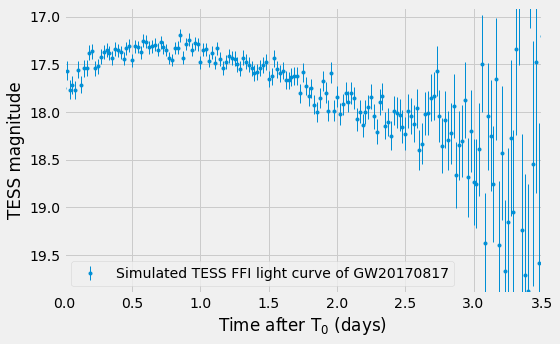

In [62]:
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])


    plt.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
             yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=1,
                 label = 'Simulated TESS FFI light curve of GW20170817')
    plt.ylim(19.9,16.9)
    plt.xlim(0,3.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('TESS magnitude')
    plt.legend(loc=3)
    fig.tight_layout()
    fig.savefig('tess-lc-gw20170817-v2.png')

In [6]:
spectrapath

['../data/spectrum-at-0p49.csv',
 '../data/spectrum-at-0p53.csv',
 '../data/spectrum-at-1p46.csv',
 '../data/spectrum-at-2p49.csv',
 '../data/spectrum-at-3p46.csv',
 '../data/spectrum-at-4p51.csv',
 '../data/spectrum-at-7p45.csv',
 '../data/spectrum-at-8p46.csv']